## Preprocessing the data

 - First thing we need to do is import libraries we need to do preprocess our data. The top libraries for these are:
  - numpy
  - pandas
  - matplotlib.pyplot
  - seaborn <br> 
 - Second, we need to make sense of the data. This step can be approached in mutlitple ways and depending on the objectives/data quality our approach should also change.

There are more libraries we can use, but for the main part these are the primaries.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
from scipy import stats
for dirname, _, filenames in os.walk("../../../../data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../../../data/gas-prices-in-brazil.zip
../../../../data/2004-2019.tsv


In [2]:
df_b = pd.read_csv("../../../../data/2004-2019.tsv", delimiter = '\t')

In [3]:
df_b.rename(
    columns={
        "DATA INICIAL": "start_date",
        "DATA FINAL": "end_date",
        "REGIÃO": "region",
        "ESTADO": "state",
        "PRODUTO": "fuel",
        "NÚMERO DE POSTOS PESQUISADOS": "n_gas_stations",
        "UNIDADE DE MEDIDA": "unit",
        "PREÇO MÉDIO REVENDA": "avg_price",
        "DESVIO PADRÃO REVENDA": "sd_price",
        "PREÇO MÍNIMO REVENDA": "min_price",
        "PREÇO MÁXIMO REVENDA": "max_price",
        "MARGEM MÉDIA REVENDA": "avg_price_margin",
        "ANO": "year",
        "MÊS": "month",
        "COEF DE VARIAÇÃO DISTRIBUIÇÃO": "coef_dist",
        "PREÇO MÁXIMO DISTRIBUIÇÃO": "dist_max_price",
        "PREÇO MÍNIMO DISTRIBUIÇÃO": "dist_min_price",
        "DESVIO PADRÃO DISTRIBUIÇÃO": "dist_sd_price",
        "PREÇO MÉDIO DISTRIBUIÇÃO": "dist_avg_price",
        "COEF DE VARIAÇÃO REVENDA": "coef_price"
    },
    inplace=True
)

regions = {"SUL":"SOUTH", "SUDESTE":"SOUTHEAST", "CENTRO OESTE":"MIDWEST", "NORTE":"NORTH", "NORDESTE":"NORTHEAST"}
df_b["region"] = df_b.region.map(regions)


fuels = {"ÓLEO DIESEL":"DIESEL", "GASOLINA COMUM":"REGULAR GASOLINE", "GLP":"LPG", "ETANOL HIDRATADO":"HYDROUS ETHANOL", "GNV":"NATURAL GAS", "ÓLEO DIESEL S10":"DIESEL S10"}
df_b["fuel"] = df_b.fuel.map(fuels)

In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary [['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values 
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2)
    return summary


In [5]:
event_dictionary_units ={'R$/l ' : 'R$/l', 'R$/13Kg' : 'R$/l', 'R$/m3' : 'R$/l'}

event_dictionary_conversion ={'R$/l' : 1 , 'R$/13Kg' : 0.00006153, 'R$/m3' : 0.001}

df_b['conversion'] = df_b['unit'].map(event_dictionary_conversion)

df_b['avg_price'] = df_b.avg_price*df_b.conversion

df_b['unit'] = df_b['unit'].map(event_dictionary_units)

df_b = df_b.drop('unit', axis = 1)

df_b.tail()


,Unnamed: 0,start_date,end_date,region,state,fuel,n_gas_stations,avg_price,sd_price,min_price,...,avg_price_margin,coef_price,dist_avg_price,dist_sd_price,dist_min_price,dist_max_price,coef_dist,month,year,conversion
106818,106818,2019-06-23,2019-06-29,NORTHEAST,RIO GRANDE DO NORTE,NATURAL GAS,7,0.003574,0.065,3.499,...,0.818,0.018,2.756,0,2.756,2.756,0,6,2019,0.001
106819,106819,2019-06-23,2019-06-29,SOUTH,RIO GRANDE DO SUL,NATURAL GAS,23,0.003401,0.129,3.230,...,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019,0.001
106820,106820,2019-06-23,2019-06-29,SOUTH,SANTA CATARINA,NATURAL GAS,24,0.002912,0.190,2.699,...,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019,0.001
106821,106821,2019-06-23,2019-06-29,SOUTHEAST,SAO PAULO,NATURAL GAS,52,0.003020,0.229,2.699,...,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019,0.001
106822,106822,2019-06-23,2019-06-29,NORTHEAST,SERGIPE,NATURAL GAS,4,0.003697,0.005,3.689,...,1.179,0.001,2.518,0,2.5175,2.5175,0,6,2019,0.001


In [6]:
for col in ['sd_price','min_price',
            'max_price','avg_price_margin','coef_price',
            'dist_avg_price', 'dist_sd_price', 'dist_min_price', 
            'dist_max_price', 'coef_dist']:
    df_b[col] = pd.to_numeric(df_b[col], errors='coerce')

    
resumetable(df_b)

Dataset Shape: (106823, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,Unnamed: 0,int64,0,106823,0,1,2,16.70
1,start_date,object,0,785,2004-05-09,2004-05-09,2004-05-09,9.61
2,end_date,object,0,785,2004-05-15,2004-05-15,2004-05-15,9.61
3,region,object,0,5,MIDWEST,MIDWEST,MIDWEST,2.21
4,state,object,0,27,DISTRITO FEDERAL,GOIAS,MATO GROSSO,4.75
5,fuel,object,0,6,HYDROUS ETHANOL,HYDROUS ETHANOL,HYDROUS ETHANOL,2.52
6,n_gas_stations,int64,0,2219,127,387,192,8.93
7,avg_price,float64,0,20579,1.288,1.162,1.389,12.88
8,sd_price,float64,0,6341,0.016,0.114,0.097,9.28
9,min_price,float64,0,2047,1.19,0.89,1.18,9.01


By changing the our object types into numeric, we lost around 3,400 data points in: <br>
 - av_price_margin
 - dist_avg_price
 - dist_sd_price
 - dist_min_price
 - dist_max_price
 - coef_dist <br>
(In order to fix this and lessen the effect of these data point missing in our data set, we fill all missing fields with a median of value for each corresponding columns.)

We can also use average, but median does the work.
 

In [7]:
df_b['avg_price_margin'].fillna(df_b['avg_price_margin'].median(), inplace = True)

df_b['dist_avg_price'].fillna(df_b['dist_avg_price'].median(), inplace = True)

df_b['dist_sd_price'].fillna(df_b['dist_sd_price'].median(), inplace = True)

df_b['dist_min_price'].fillna(df_b['dist_min_price'].median(), inplace = True)

df_b['dist_max_price'].fillna(df_b['dist_max_price'].median(), inplace = True)

df_b['coef_dist'].fillna(df_b['coef_dist'].median(), inplace = True)

We will also change the dtype of 'region', 'state', and 'fuel' from categorical to numerical. We will use sklearn library and use the function "LabelEncoder" to turn them into comparable categories.

In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder_region = LabelEncoder()
df_b.region = labelencoder_region.fit_transform(df_b.region)

labelencoder_state = LabelEncoder()
df_b.state = labelencoder_state.fit_transform(df_b.state)

labelencoder_fuel = LabelEncoder()
df_b.fuel = labelencoder_fuel.fit_transform(df_b.fuel)


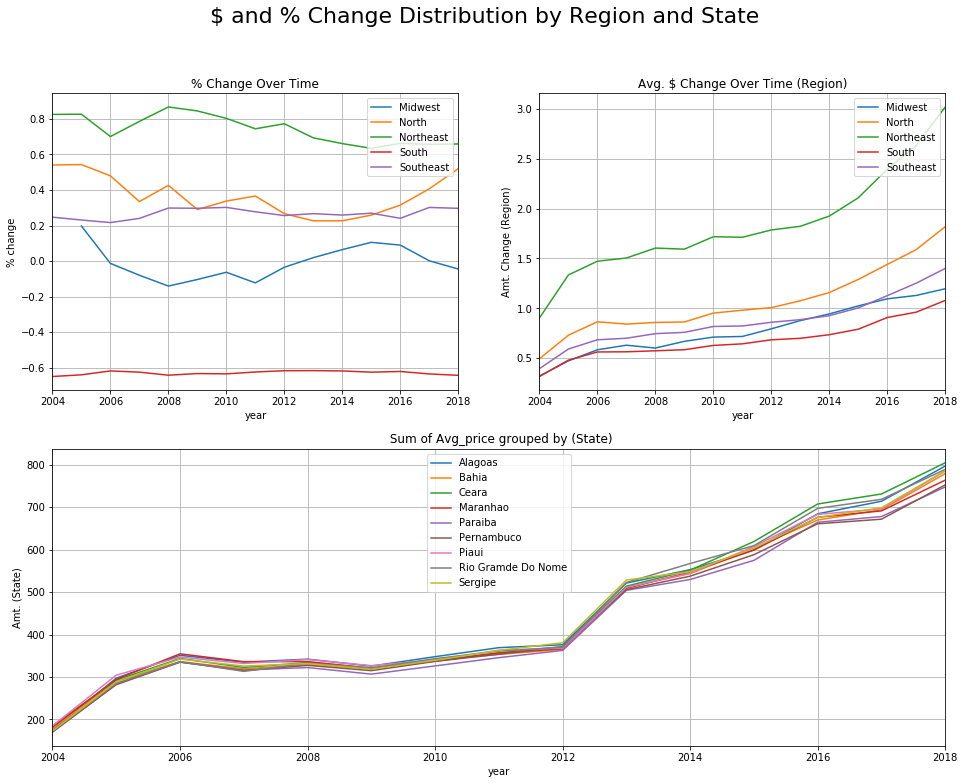

In [24]:
plt.figure(figsize=(16,12))
plt.suptitle('$ and % Change Distribution by Region and State', fontsize=22)

ax = plt.subplot(221)
df_b.query('year != 2019 & fuel in ["3","4"]').groupby(['year','region']).sum()['avg_price'].pct_change().unstack().plot(ax=ax)
plt.legend( labels = ['Midwest', 'North', 'Northeast', 'South', 'Southeast'], loc = 'upper right')
plt.title('% Change Over Time')
plt.ylabel('% change')

plt.grid(True)

ax = plt.subplot(222)
df_b.query('year != 2019 & fuel in ["3","4"]').groupby(['year','region']).sum()['avg_price'].unstack().plot(ax=ax)
plt.legend( labels = ['Midwest', 'North', 'Northeast', 'South', 'Southeast'], loc = 'upper right')
plt.title('Avg. $ Change Over Time (Region)')
plt.ylabel('Amt. Change (Region)')

plt.grid(True)



ax = plt.subplot(212)
df_b.query('year != 2019 & region in ["2"]').groupby(['year','state']).sum()['avg_price'].unstack().plot(ax=ax)
plt.legend(labels = ['Alagoas', 'Bahia', 'Ceara', 'Maranhao', 'Paraiba', 'Pernambuco', 'Piaui', 'Rio Gramde Do Nome', 'Sergipe'], loc = 'upper center')
plt.title(' Sum of Avg_price grouped by (State)')
plt.ylabel('Amt. (State)')
plt.grid(True)




